# M1L1 Screencasts


## M1L1SC1: Training a Discriminative Model: Logistic Regression on 2D Blobs

### Step 1: Generating 2D Toy Dataset

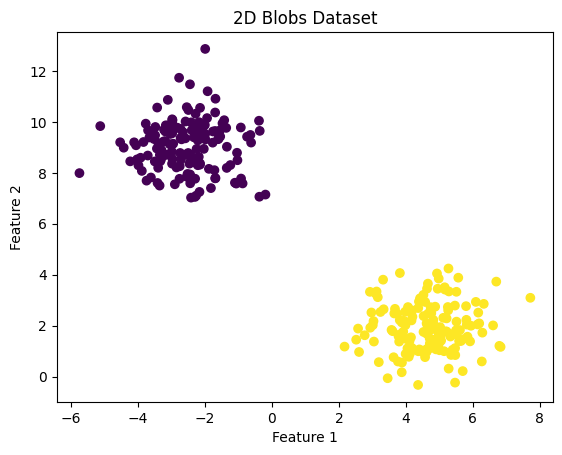

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate 2D blobs for two classes
X, y = make_blobs(n_samples=300, centers=2, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('2D Blobs Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### Step 2: Converting Data to PyTorch Tensors

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert features and labels to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.int64)

# Create a dataset and data loader
dataset = TensorDataset(X_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

### Step 3: Training the Logistic Regression Model

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define the model
model = nn.Sequential(
    nn.Linear(2, 1),  # Two input features, one output
    nn.Sigmoid()      # Sigmoid activation for binary classification
)

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Training Loop
for epoch in range(50):
    for X_batch, y_batch in data_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch.float())
        loss.backward()         # Backpropagate
        optimizer.step()        # Step the optimizer

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 2.5132486820220947
Epoch 10, Loss: 0.07202035933732986
Epoch 20, Loss: 0.04613608121871948
Epoch 30, Loss: 0.02992657758295536
Epoch 40, Loss: 0.021059200167655945


### Step 4: Visualizing the Decision Boundary

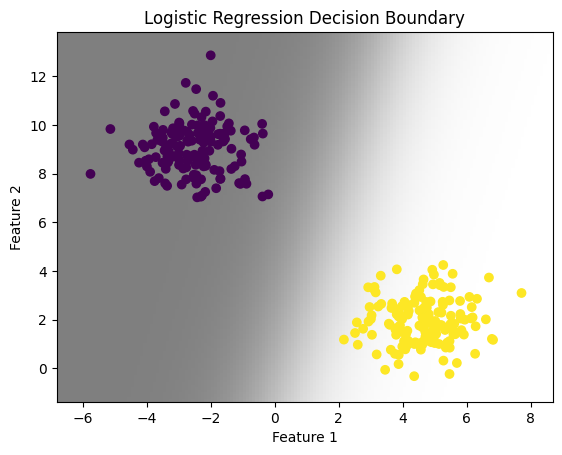

In [ ]:
import numpy as np

# Generate grid of points
xx, yy = np.meshgrid(np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.1),
                     np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.1))

# Flatten grid
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Get model predictions
pred_grid = model(grid).detach().numpy().reshape(xx.shape)

# Plot decision boundary
plt.pcolormesh(xx, yy, pred_grid, cmap='gray', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## M1L1SC2: Fitting and Visualizing a Generative Model

### Step 1: Generating Our Training Data

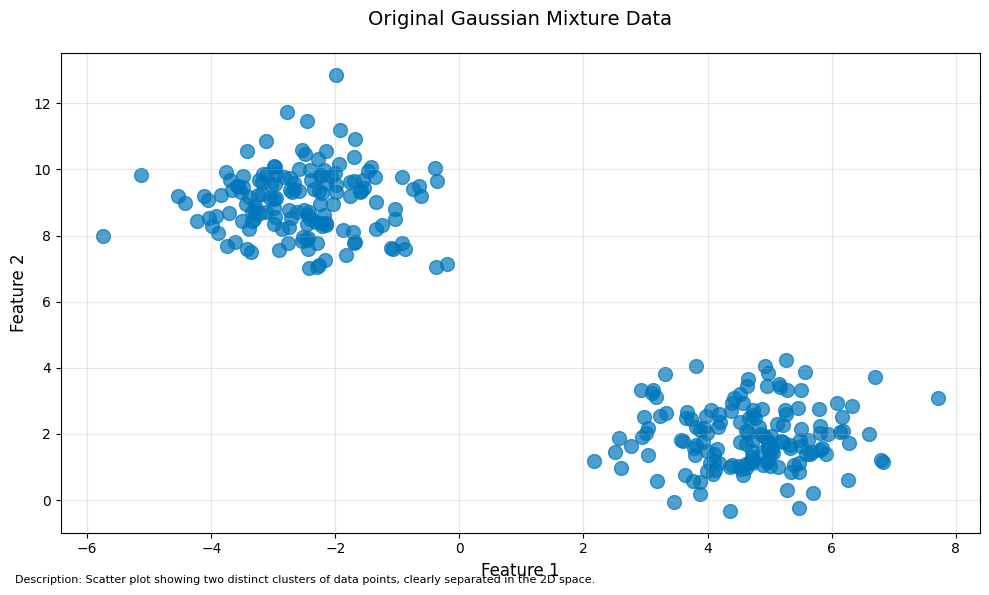

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic Gaussian blobs
X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.0, random_state=42)

# # Visualize the original dataset
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
# plt.title('Original Gaussian Mixture Data')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1],
           c='#0077BB',     # Colorblind-friendly blue
           marker='o',      # Clear marker shape
           alpha=0.7,       # Increased visibility
           s=100)          # Larger point size
plt.title('Original Gaussian Mixture Data', fontsize=14, pad=20)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.figtext(0.02, 0.02,
           "Description: Scatter plot showing two distinct clusters " +
           "of data points, clearly separated in the 2D space.",
           wrap=True, fontsize=8)
plt.tight_layout()
plt.show()

### Step 2: Fitting a Gaussian Distribution

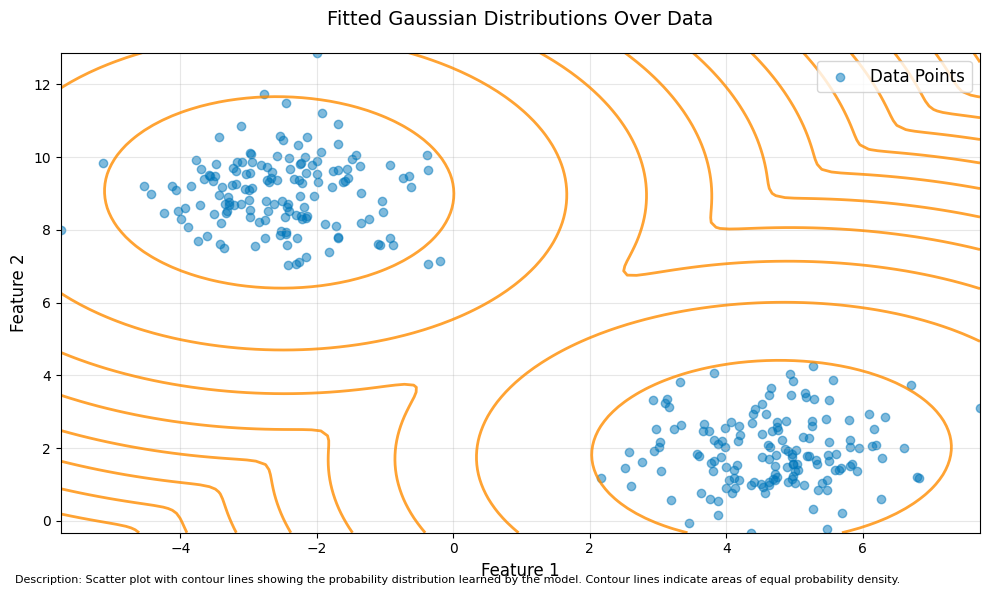

In [ ]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian distributions
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)

# Visualize fitted distributions
# x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
# y = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
# X_grid, Y_grid = np.meshgrid(x, y)
# Z = -gmm.score_samples(np.c_[X_grid.ravel(), Y_grid.ravel()])
# Z = Z.reshape(X_grid.shape)

# plt.contour(X_grid, Y_grid, Z, levels=10, linewidths=1, alpha=0.7)
# plt.title('Fitted Gaussian Distributions Over Data')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

plt.figure(figsize=(10, 6))
# Plot original data points
plt.scatter(X[:, 0], X[:, 1],
           c='#0077BB',     # Colorblind-friendly blue
           marker='o',
           alpha=0.5,
           label='Data Points')

# Plot contours with enhanced visibility
plt.contour(X_grid, Y_grid, Z,
           levels=10,
           linewidths=2,    # Thicker lines
           colors=['#FF8C00'],  # Colorblind-friendly orange
           alpha=0.8)

plt.title('Fitted Gaussian Distributions Over Data', fontsize=14, pad=20)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.figtext(0.02, 0.02,
           "Description: Scatter plot with contour lines showing " +
           "the probability distribution learned by the model. " +
           "Contour lines indicate areas of equal probability density.",
           wrap=True, fontsize=8)
plt.tight_layout()
plt.show()

### Step 3: Sampling from the Generative Model

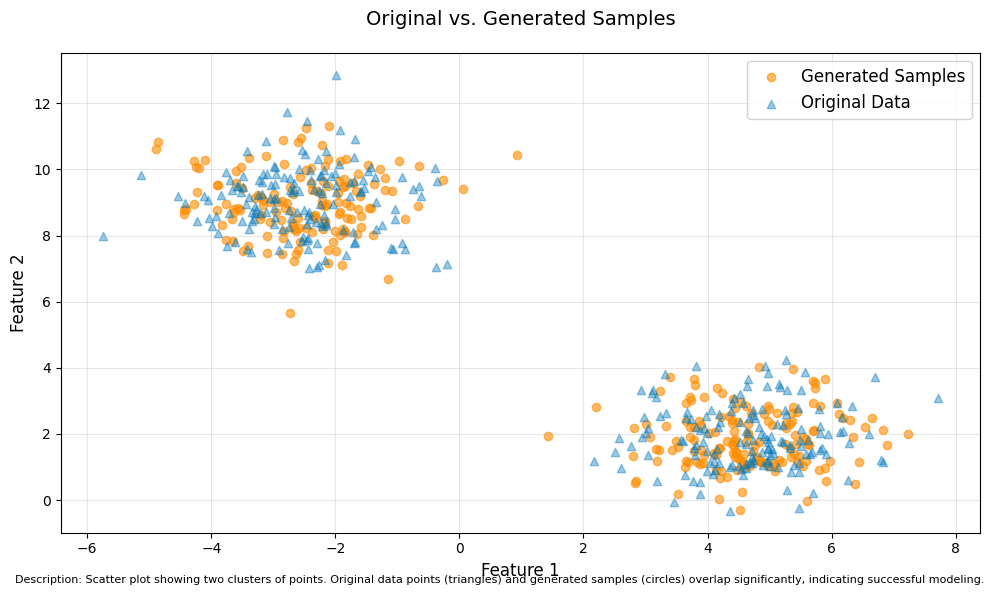

In [ ]:
# Sample new points
new_samples, _ = gmm.sample(300)

# # Plot generated samples
# plt.scatter(new_samples[:, 0], new_samples[:, 1], c='red', alpha=0.6, label='Generated Samples')
# plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.4, label='Original Data')
# plt.title('Original vs. Generated Samples')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend(loc='upper right')
# plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(new_samples[:, 0], new_samples[:, 1],
           marker='o',
           c='#FF8C00',
           alpha=0.6,
           label='Generated Samples')
plt.scatter(X[:, 0], X[:, 1],
           marker='^',
           c='#0077BB',
           alpha=0.4,
           label='Original Data')
plt.title('Original vs. Generated Samples', fontsize=14, pad=20)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(loc='upper right', fontsize=12, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.figtext(0.02, 0.02,
           "Description: Scatter plot showing two clusters of points. " +
           "Original data points (triangles) and generated samples (circles) " +
           "overlap significantly, indicating successful modeling.",
           wrap=True, fontsize=8)
plt.tight_layout()
plt.show()